In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [51]:
data=pd.read_csv('/content/loan.csv')

In [52]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [53]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
data=data.dropna()

In [55]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [56]:
# label encoding
data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [57]:
data.shape

(480, 13)

In [58]:
#o. of different values
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [59]:
data['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [60]:
# replacing 3+ to 4
data=data.replace(to_replace='3+',value=4)

In [61]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


<Axes: xlabel='Married', ylabel='count'>

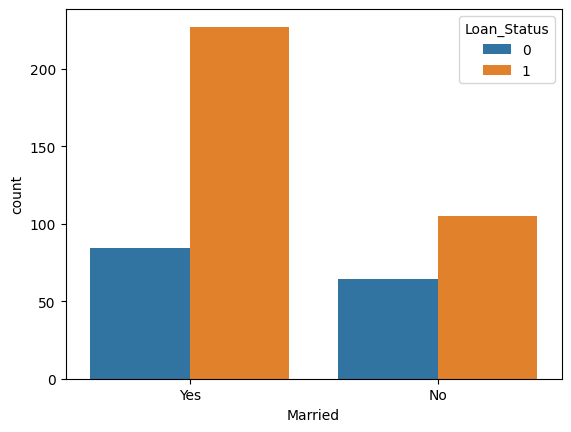

In [62]:
#plots seaborn
sns.countplot(x='Married',hue='Loan_Status',data=data)

In [74]:
#replacing all the text data in columns to numerical form
data.replace({"Gender":{'Male':1,'Female':0},'Married':{'Yes':1,'No':0},'Education':{'Graduate':1,'Not Graduate':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Self_Employed':{'Yes':1,'No':0}},inplace=True)

In [75]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [76]:
#Seperate data and label
X=data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=data['Loan_Status']


In [77]:
X
Y


1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [78]:
#Train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [79]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


In [80]:
#Train SVM
model=svm.SVC(kernel='linear')

In [81]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [85]:
#accuracy prediction
X_train_predict=model.predict(X_train)
X_train_accuracy=accuracy_score(X_train_predict,Y_train)
print(X_train_accuracy)

0.7786458333333334


In [86]:
X_test_predict=model.predict(X_test)
X_test_accuracy=accuracy_score(X_test_predict,Y_test)
print(X_test_accuracy)

0.8125
